# Pandas introduction

Import the pandas package, and set matplotlib inline.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from pandas import set_option
set_option("display.max_rows", 16)
LARGE_FIGSIZE = (12, 8)

Check this with the version number below.

In [4]:
pd.__version__

'1.0.1'

## Importing data

Read a whitespace-separated file of data, set index to the first column, and parse it since those are dates.

In [5]:
filename = 'data/temperatures/annual.land_ocean.90S.90N.df_1901-2000mean.dat'
full_globe_temp = pd.read_table(filename, sep=r'\s+', names=['year', 'mean temp'],
                                index_col=0, parse_dates=True)
print(type(full_globe_temp))
full_globe_temp

<class 'pandas.core.frame.DataFrame'>


,mean temp
year,
1880-01-01,-0.1591
1881-01-01,-0.0789
1882-01-01,-0.1313
1883-01-01,-0.1675
1884-01-01,-0.2485
...,...
2006-01-01,0.5601
2007-01-01,0.5472
2008-01-01,0.4804


Reading a somewhat more involved data file having a header and footer that should be skipped.

In [6]:
giss_temp = pd.read_table('data/temperatures/GLB.Ts+dSST.txt', sep='\s+',
                          skiprows=7, skipfooter=11, engine='python')
giss_temp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
0,1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1,1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
2,1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
3,1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
4,1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2012,38,43,52,62,71,59,50,56,68,73,69,46,57,57,43,62,55,70,2012
139,2013,62,52,60,48,56,61,53,61,73,61,75,61,60,59,53,55,58,70,2013
140,2014,68,44,71,72,79,62,50,74,81,78,64,74,68,67,58,74,62,74,2014
141,2015,75,80,84,71,****,****,****,****,****,****,****,****,****,***,76,****,****,****,2015


In [7]:
co2 = pd.read_table('data/greenhouse_gaz/co2_mm_global.txt', sep='\s+',
                    parse_dates=[[0, 1]])
co2

,year_month,decimal,average,trend
0,1980-01-01,1980.042,338.45,337.82
1,1980-02-01,1980.125,339.17,338.12
2,1980-03-01,1980.208,339.49,338.14
3,1980-04-01,1980.292,339.87,338.25
4,1980-05-01,1980.375,340.30,338.78
...,...,...,...,...
419,2014-12-01,2014.958,398.62,398.08
420,2015-01-01,2015.042,399.31,398.29
421,2015-02-01,2015.125,400.01,398.59
422,2015-03-01,2015.208,400.59,398.96


In [8]:
northren_sea_level = pd.read_table('http://sealevel.colorado.edu/files/current/sl_nh.txt', sep='\s+')
northren_sea_level

,year,msl_ib(mm),#version_2016_rel4
0,1992.9323,13.717,NaN
1,1992.9595,1.328,NaN
2,1992.9866,-13.375,NaN
3,1993.0138,-24.723,NaN
4,1993.0409,-29.231,NaN
...,...,...,...
864,2016.4426,75.595,NaN
865,2016.4697,80.087,NaN
866,2016.4969,81.619,NaN
867,2016.5240,83.580,NaN


In [9]:
southren_sea_level = pd.read_table('http://sealevel.colorado.edu/files/current/sl_sh.txt', sep='\s+')
southren_sea_level

,year,msl_ib(mm),#version_2016_rel4
0,1992.9323,2.517,NaN
1,1992.9595,-7.645,NaN
2,1992.9866,-2.267,NaN
3,1993.0138,0.855,NaN
4,1993.0409,-2.020,NaN
...,...,...,...
864,2016.4426,67.053,NaN
865,2016.4697,65.238,NaN
866,2016.4969,54.950,NaN
867,2016.5240,53.514,NaN


In [10]:
global_sea_level = pd.read_table('http://sealevel.colorado.edu/files/2015_rel2/sl_ns_global.txt', sep='\s+')
global_sea_level

,year,msl_ib_ns(mm),#version_2015_rel2
0,1992.9595,-5.818,NaN
1,1992.9866,-7.525,NaN
2,1993.0138,-9.215,NaN
3,1993.0409,-11.796,NaN
4,1993.0681,-11.291,NaN
...,...,...,...
775,2015.0309,64.804,NaN
776,2015.0580,62.115,NaN
777,2015.0852,68.589,NaN
778,2015.1123,69.745,NaN


Reading tables from the web is easy, it results in a list of all tables on a page.

In [11]:
table_list = pd.read_html('http://www.psmsl.org/data/obtaining/')
local_sea_level_stations = table_list[0]
local_sea_level_stations

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,BREST,1,48.383,-4.495,242.0,FRA,07/08/2019,190,91
1,SWINOUJSCIE,2,53.917,14.233,NaN,POL,19/10/2001,110,92
2,SHEERNESS,3,51.446,0.743,NaN,GBR,06/06/2019,170,101
3,HOLYHEAD,5,53.314,-4.620,NaN,GBR,06/06/2019,170,191
4,CUXHAVEN 2,7,53.867,8.717,284.0,DEU,01/10/2019,140,12
...,...,...,...,...,...,...,...,...,...
1543,ST LAWRENCE,2354,46.917,-55.390,NaN,CAN,18/06/2019,970,113
1544,SUVA-B,2356,-18.133,178.428,NaN,FJI,28/01/2020,742,14
1545,SYDNEY PORT JACKSON,2358,-33.826,151.259,NaN,AUS,13/06/2019,680,138
1546,ARKO,2359,58.484,16.961,NaN,SWE,12/09/2019,50,112


Data can also be read from Excel files (given that the necessary Python packages are installed).

In [12]:
sales = pd.read_excel('data/sales-funnel.xlsx')
sales

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
...,...,...,...,...,...,...,...,...
12,239344,Stokes LLC,Cedric Moss,Fred Anderson,Software,1,10000,presented
13,307599,"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,Maintenance,3,7000,won
14,688981,Keeling LLC,Wendy Yule,Fred Anderson,CPU,5,100000,won
15,729833,Koepp Ltd,Wendy Yule,Fred Anderson,CPU,2,65000,declined


## Pandas data structures

Examening the type and features of a pandas dataframe.

In [13]:
type(giss_temp)

pandas.core.frame.DataFrame

In [14]:
print(giss_temp.shape)
print(giss_temp.dtypes)

(143, 20)
Year      object
Jan       object
Feb       object
Mar       object
Apr       object
           ...  
DJF       object
MAM       object
JJA       object
SON       object
Year.1    object
Length: 20, dtype: object


In [15]:
giss_temp.index

RangeIndex(start=0, stop=143, step=1)

In [16]:
giss_temp.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON',
       'Year.1'],
      dtype='object')

In [17]:
giss_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    143 non-null    object
 1   Jan     143 non-null    object
 2   Feb     143 non-null    object
 3   Mar     143 non-null    object
 4   Apr     143 non-null    object
 5   May     143 non-null    object
 6   Jun     143 non-null    object
 7   Jul     143 non-null    object
 8   Aug     143 non-null    object
 9   Sep     143 non-null    object
 10  Oct     143 non-null    object
 11  Nov     143 non-null    object
 12  Dec     143 non-null    object
 13  J-D     143 non-null    object
 14  D-N     143 non-null    object
 15  DJF     143 non-null    object
 16  MAM     143 non-null    object
 17  JJA     143 non-null    object
 18  SON     143 non-null    object
 19  Year.1  143 non-null    object
dtypes: object(20)
memory usage: 22.5+ KB


### Series

In [18]:
full_globe_temp.columns

Index(['mean temp'], dtype='object')

In [19]:
full_globe_temp = full_globe_temp['mean temp']

In [20]:
type(full_globe_temp)

pandas.core.series.Series

In [21]:
full_globe_temp.dtype

dtype('float64')

In [22]:
full_globe_temp.shape

(131,)

In [23]:
full_globe_temp.nbytes

1048

In [24]:
full_globe_temp.index

DatetimeIndex(['1880-01-01', '1881-01-01', '1882-01-01', '1883-01-01',
               '1884-01-01', '1885-01-01', '1886-01-01', '1887-01-01',
               '1888-01-01', '1889-01-01',
               ...
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01'],
              dtype='datetime64[ns]', name='year', length=131, freq=None)

In [25]:
full_globe_temp.values

array([-1.591e-01, -7.890e-02, -1.313e-01, -1.675e-01, -2.485e-01,
       -2.042e-01, -1.695e-01, -2.505e-01, -1.605e-01, -1.103e-01,
       -3.014e-01, -2.527e-01, -2.926e-01, -3.274e-01, -2.880e-01,
       -2.146e-01, -1.009e-01, -1.294e-01, -2.517e-01, -1.356e-01,
       -1.125e-01, -1.693e-01, -2.255e-01, -3.442e-01, -3.799e-01,
       -2.583e-01, -2.060e-01, -3.726e-01, -3.922e-01, -4.041e-01,
       -3.860e-01, -4.144e-01, -3.422e-01, -3.196e-01, -1.599e-01,
       -8.100e-02, -2.803e-01, -3.227e-01, -2.106e-01, -2.186e-01,
       -2.025e-01, -1.390e-01, -2.222e-01, -2.063e-01, -1.843e-01,
       -1.260e-01, -1.920e-02, -1.007e-01, -9.350e-02, -2.201e-01,
       -2.820e-02,  4.100e-03, -2.850e-02, -1.616e-01, -2.850e-02,
       -5.650e-02, -3.180e-02,  7.270e-02,  9.550e-02,  8.980e-02,
        1.234e-01,  1.837e-01,  1.377e-01,  1.299e-01,  2.362e-01,
        1.162e-01, -2.020e-02, -4.060e-02, -4.940e-02, -7.520e-02,
       -1.635e-01, -2.900e-03,  3.530e-02,  1.190e-01, -1.028e

### Creating dataframes

Combining two data sets into one pandas  dataframe. The original dataframes should be indexed similarly, and have the same size data.

In [26]:
np.all(southren_sea_level.year == northren_sea_level.year)

True

In [27]:
len(northren_sea_level) == len(southren_sea_level)

True

The year will be the index, and there are two columns of data.

In [28]:
mean_sea_level = pd.DataFrame({'northern_hem': northren_sea_level['msl_ib(mm)'].values,
                               'southren_hem': southren_sea_level['msl_ib(mm)'].values},
                               index=northren_sea_level.year)
mean_sea_level

,northern_hem,southren_hem
year,,
1992.9323,13.717,2.517
1992.9595,1.328,-7.645
1992.9866,-13.375,-2.267
1993.0138,-24.723,0.855
1993.0409,-29.231,-2.020
...,...,...
2016.4426,75.595,67.053
2016.4697,80.087,65.238
2016.4969,81.619,54.950


## Cleaning and formatting

### Renaming columns

Rename columns so that they don't have '.' characters in them.

In [29]:
local_sea_level_stations.columns

Index(['Station Name', 'ID', 'Lat.', 'Lon.', 'GLOSS ID', 'Country', 'Date',
       'Coastline', 'Station'],
      dtype='object')

In [30]:
local_sea_level_stations.columns = [name.strip().replace('.', '')
                                       for name in local_sea_level_stations.columns]
local_sea_level_stations

,Station Name,ID,Lat,Lon,GLOSS ID,Country,Date,Coastline,Station
0,BREST,1,48.383,-4.495,242.0,FRA,07/08/2019,190,91
1,SWINOUJSCIE,2,53.917,14.233,NaN,POL,19/10/2001,110,92
2,SHEERNESS,3,51.446,0.743,NaN,GBR,06/06/2019,170,101
3,HOLYHEAD,5,53.314,-4.620,NaN,GBR,06/06/2019,170,191
4,CUXHAVEN 2,7,53.867,8.717,284.0,DEU,01/10/2019,140,12
...,...,...,...,...,...,...,...,...,...
1543,ST LAWRENCE,2354,46.917,-55.390,NaN,CAN,18/06/2019,970,113
1544,SUVA-B,2356,-18.133,178.428,NaN,FJI,28/01/2020,742,14
1545,SYDNEY PORT JACKSON,2358,-33.826,151.259,NaN,AUS,13/06/2019,680,138
1546,ARKO,2359,58.484,16.961,NaN,SWE,12/09/2019,50,112


Rename the index.

In [31]:
mean_sea_level.index.name = 'date'

In [32]:
mean_sea_level

,northern_hem,southren_hem
date,,
1992.9323,13.717,2.517
1992.9595,1.328,-7.645
1992.9866,-13.375,-2.267
1993.0138,-24.723,0.855
1993.0409,-29.231,-2.020
...,...,...
2016.4426,75.595,67.053
2016.4697,80.087,65.238
2016.4969,81.619,54.950


### Setting NaNs

Missing values in `full_globe_temp` are represented by `-999.000`, but they should be set to NaNs in order to get good results.

In [34]:
full_globe_temp == -999.000

year
1880-01-01    False
1881-01-01    False
1882-01-01    False
1883-01-01    False
1884-01-01    False
              ...  
2006-01-01    False
2007-01-01    False
2008-01-01    False
2009-01-01    False
2010-01-01     True
Name: mean temp, Length: 131, dtype: bool

In [35]:
missing_value_mask = (full_globe_temp == -999.000)

In [36]:
missing_value_mask.value_counts()

False    130
True       1
Name: mean temp, dtype: int64

In [37]:
#full_globe_temp[missing_value_mask] = np.nan
full_globe_temp[full_globe_temp == -999.000] = np.nan

full_globe_temp

year
1880-01-01   -0.1591
1881-01-01   -0.0789
1882-01-01   -0.1313
1883-01-01   -0.1675
1884-01-01   -0.2485
               ...  
2006-01-01    0.5601
2007-01-01    0.5472
2008-01-01    0.4804
2009-01-01    0.5551
2010-01-01       NaN
Name: mean temp, Length: 131, dtype: float64

### Setting the index

Use the `Year` column as the index.

In [38]:
giss_temp = giss_temp.set_index('Year')
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
Year,,,,,,,,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,38,43,52,62,71,59,50,56,68,73,69,46,57,57,43,62,55,70,2012
2013,62,52,60,48,56,61,53,61,73,61,75,61,60,59,53,55,58,70,2013
2014,68,44,71,72,79,62,50,74,81,78,64,74,68,67,58,74,62,74,2014


### Dropping columns and rows

Drop the useless `Year.1` column.

In [39]:
giss_temp = giss_temp.drop('Year.1', axis=1)

Or, alternatively, keep only a subset of columns in the dataframe.

In [40]:
giss_temp = giss_temp[[u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun',
                       u'Jul', u'Aug', u'Sep', u'Oct', u'Nov', u'Dec']]
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,38,43,52,62,71,59,50,56,68,73,69,46
2013,62,52,60,48,56,61,53,61,73,61,75,61
2014,68,44,71,72,79,62,50,74,81,78,64,74


In [41]:
giss_temp = giss_temp.drop('Year')

Missing values are indicated by `****`, replace by NaNs for proper handling.

In [42]:
giss_temp = giss_temp.where(giss_temp != '****', np.nan)
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,45,44,57,60,47,54,70,69,52,60,50,48
2012,38,43,52,62,71,59,50,56,68,73,69,46
2013,62,52,60,48,56,61,53,61,73,61,75,61


### Adding a column

The `mean_sea_level` dataframe has data for the northren and southren hemisphere, and it would be useful to add the global values as well.

In [46]:
mean_sea_level

,northern_hem,southren_hem
date,,
1992.9323,13.717,2.517
1992.9595,1.328,-7.645
1992.9866,-13.375,-2.267
1993.0138,-24.723,0.855
1993.0409,-29.231,-2.020
...,...,...
2016.4426,75.595,67.053
2016.4697,80.087,65.238
2016.4969,81.619,54.950


In [44]:
global_sea_level

,year,msl_ib_ns(mm),#version_2015_rel2
0,1992.9595,-5.818,NaN
1,1992.9866,-7.525,NaN
2,1993.0138,-9.215,NaN
3,1993.0409,-11.796,NaN
4,1993.0681,-11.291,NaN
...,...,...,...
775,2015.0309,64.804,NaN
776,2015.0580,62.115,NaN
777,2015.0852,68.589,NaN
778,2015.1123,69.745,NaN


In [45]:
global_sea_level = global_sea_level.set_index('year')
global_sea_level

,msl_ib_ns(mm),#version_2015_rel2
year,,
1992.9595,-5.818,NaN
1992.9866,-7.525,NaN
1993.0138,-9.215,NaN
1993.0409,-11.796,NaN
1993.0681,-11.291,NaN
...,...,...
2015.0309,64.804,NaN
2015.0580,62.115,NaN
2015.0852,68.589,NaN


In [47]:
mean_sea_level['mean_global'] = global_sea_level['msl_ib_ns(mm)']
mean_sea_level

,northern_hem,southren_hem,mean_global
date,,,
1992.9323,13.717,2.517,NaN
1992.9595,1.328,-7.645,-5.818
1992.9866,-13.375,-2.267,-7.525
1993.0138,-24.723,0.855,-9.215
1993.0409,-29.231,-2.020,-11.796
...,...,...,...
2016.4426,75.595,67.053,NaN
2016.4697,80.087,65.238,NaN
2016.4969,81.619,54.950,NaN


Note that NaNs are added for missing values, i.e., if the new column has no data for a particular index value.

Computations on columns can now be performed easily.

In [48]:
(mean_sea_level.northern_hem + mean_sea_level.southren_hem)/2.0 - global_sea_level['msl_ib_ns(mm)']

1992.9323       NaN
1992.9595    2.6595
1992.9866   -0.2960
1993.0138   -2.7190
1993.0409   -3.8295
              ...  
2016.4426       NaN
2016.4697       NaN
2016.4969       NaN
2016.5240       NaN
2016.5512       NaN
Length: 869, dtype: float64

### Changing dtypes

The `dtype` of the columns is in fact the generic `object`, while the values are floating point numbers.  This can be corrected easily using the `astype` method, replacing all values.

In [51]:
giss_temp.dtypes
#giss_temp.columns

Jan    object
Feb    object
Mar    object
Apr    object
May    object
Jun    object
Jul    object
Aug    object
Sep    object
Oct    object
Nov    object
Dec    object
dtype: object

In [52]:
for col in giss_temp.columns:
    giss_temp.loc[:, col] = giss_temp[col].astype(np.float32)
giss_temp.dtypes

Jan    float32
Feb    float32
Mar    float32
Apr    float32
May    float32
Jun    float32
Jul    float32
Aug    float32
Sep    float32
Oct    float32
Nov    float32
Dec    float32
dtype: object

Also the type of the index can be modified to a more sane integer type.

In [53]:
giss_temp.index.dtype

dtype('O')

In [54]:
giss_temp.index = giss_temp.index.astype(np.int32)

In [55]:
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34.0,-27.0,-22.0,-30.0,-16.0,-24.0,-19.0,-12.0,-20.0,-19.0,-16.0,-21.0
1881,-13.0,-16.0,-2.0,-3.0,-3.0,-27.0,-12.0,-8.0,-18.0,-23.0,-28.0,-18.0
1882,3.0,4.0,-2.0,-24.0,-20.0,-32.0,-27.0,-11.0,-11.0,-25.0,-25.0,-37.0
1883,-38.0,-38.0,-12.0,-20.0,-20.0,-8.0,-3.0,-13.0,-19.0,-19.0,-28.0,-21.0
1884,-20.0,-14.0,-31.0,-36.0,-33.0,-36.0,-31.0,-24.0,-29.0,-25.0,-29.0,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,45.0,44.0,57.0,60.0,47.0,54.0,70.0,69.0,52.0,60.0,50.0,48.0
2012,38.0,43.0,52.0,62.0,71.0,59.0,50.0,56.0,68.0,73.0,69.0,46.0
2013,62.0,52.0,60.0,48.0,56.0,61.0,53.0,61.0,73.0,61.0,75.0,61.0


## Visualization

Series can be plotted trivially as a function of their index.

In [58]:
full_globe_temp

year
1880-01-01   -0.1591
1881-01-01   -0.0789
1882-01-01   -0.1313
1883-01-01   -0.1675
1884-01-01   -0.2485
               ...  
2006-01-01    0.5601
2007-01-01    0.5472
2008-01-01    0.4804
2009-01-01    0.5551
2010-01-01       NaN
Name: mean temp, Length: 131, dtype: float64

In [57]:
full_globe_temp.describe()

count    130.000000
mean       0.006821
std        0.252696
min       -0.414400
25%       -0.169450
50%       -0.028500
75%        0.136600
max        0.615400
Name: mean temp, dtype: float64

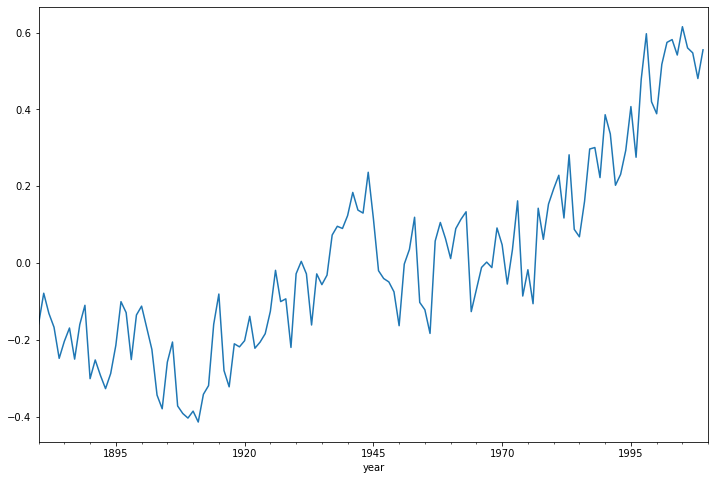

In [60]:
full_globe_temp.plot(figsize=LARGE_FIGSIZE);

Also dataframes can be plotted, resulting in a line per columns, or in a plot per column when using `subplots`.

In [61]:
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34.0,-27.0,-22.0,-30.0,-16.0,-24.0,-19.0,-12.0,-20.0,-19.0,-16.0,-21.0
1881,-13.0,-16.0,-2.0,-3.0,-3.0,-27.0,-12.0,-8.0,-18.0,-23.0,-28.0,-18.0
1882,3.0,4.0,-2.0,-24.0,-20.0,-32.0,-27.0,-11.0,-11.0,-25.0,-25.0,-37.0
1883,-38.0,-38.0,-12.0,-20.0,-20.0,-8.0,-3.0,-13.0,-19.0,-19.0,-28.0,-21.0
1884,-20.0,-14.0,-31.0,-36.0,-33.0,-36.0,-31.0,-24.0,-29.0,-25.0,-29.0,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,45.0,44.0,57.0,60.0,47.0,54.0,70.0,69.0,52.0,60.0,50.0,48.0
2012,38.0,43.0,52.0,62.0,71.0,59.0,50.0,56.0,68.0,73.0,69.0,46.0
2013,62.0,52.0,60.0,48.0,56.0,61.0,53.0,61.0,73.0,61.0,75.0,61.0


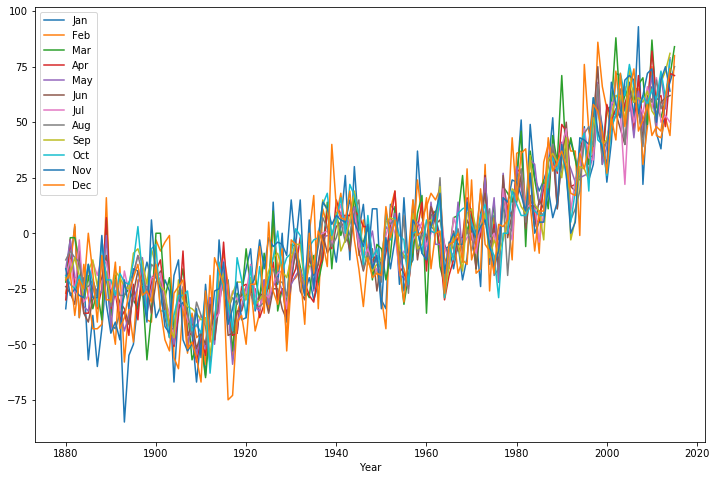

In [66]:
giss_temp.plot(figsize=LARGE_FIGSIZE);

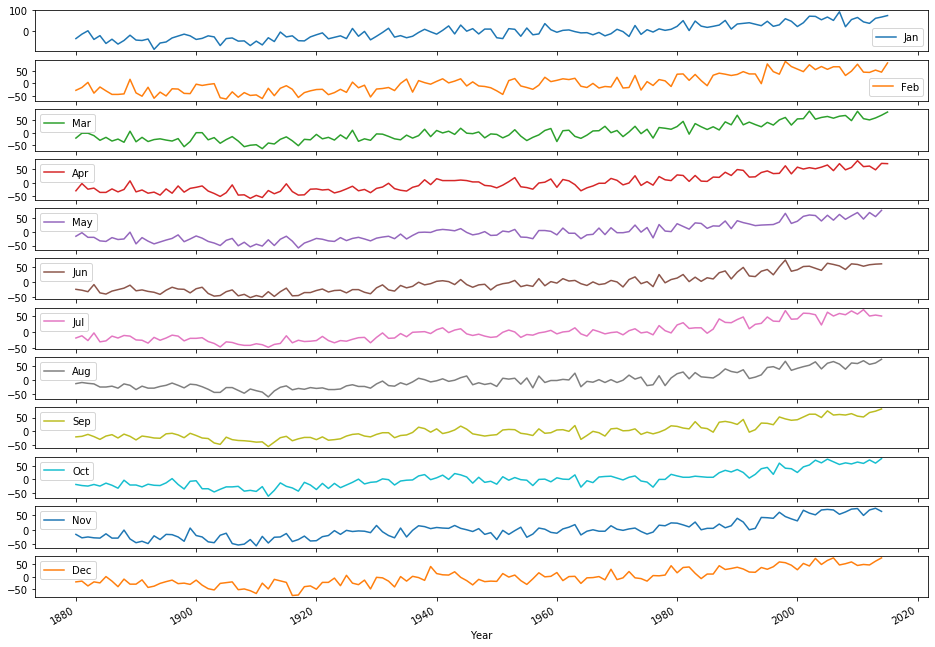

In [68]:
giss_temp.plot(subplots=True, figsize=(16, 12));

A useful plot type is a kernel distribution estimate, or `kde`.  Also a box plot is nice to get a feeling for the distribution of the values per month.

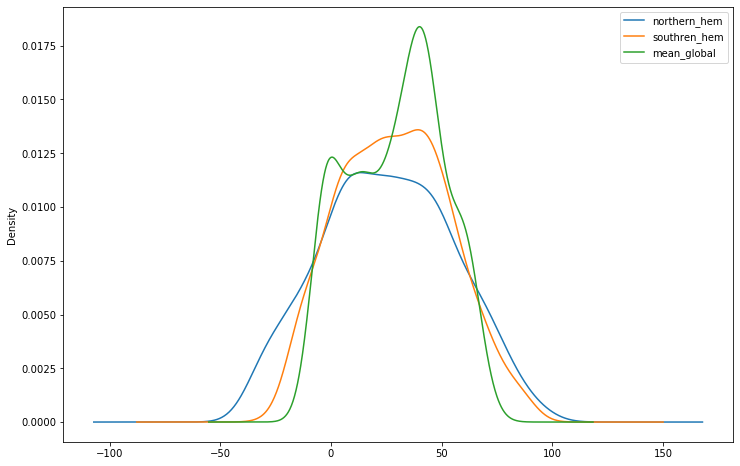

In [69]:
mean_sea_level.plot(kind='kde', figsize=(12, 8));

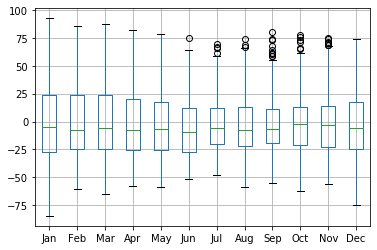

In [70]:
giss_temp.boxplot(return_type='dict');

A scatter matrix can be used to visualize the correlation between all columns of a pandas dataframe.

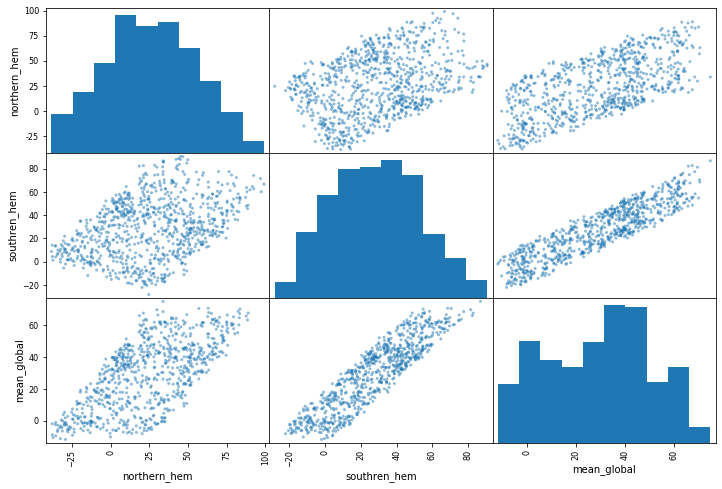

In [71]:
from pandas.plotting import scatter_matrix
scatter_matrix(mean_sea_level, figsize=LARGE_FIGSIZE);

## Accessing data in pandas data structures

In [75]:
type(full_globe_temp.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [76]:
my_date = pd.Timestamp('1885')
print(my_date)
print(type(my_date))
full_globe_temp[my_date]

1885-01-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


-0.2042

Although it is possible to access data using the usual square bracket notation, it is more robust to use the `loc` object, or, for actual positions in dataframes, the `iloc` object part of pandas data structures.

In [79]:
full_globe_temp.loc[my_date]

-0.2042

In [80]:
full_globe_temp.iloc[0]

-0.1591

In [83]:
full_globe_temp.iloc[-3:-1]

year
2008-01-01    0.4804
2009-01-01    0.5551
Name: mean temp, dtype: float64

In [84]:
full_globe_temp.index[-1]

Timestamp('2010-01-01 00:00:00')

Adding a row of data is possible as well.  NaN is used here since we don't have actual data.

In [85]:
full_globe_temp[pd.Timestamp('2011')] = np.nan

In [86]:
full_globe_temp.tail(5)

year
2007-01-01    0.5472
2008-01-01    0.4804
2009-01-01    0.5551
2010-01-01       NaN
2011-01-01       NaN
Name: mean temp, dtype: float64

Dataframes are accessed in a similar manner as series.

In [87]:
giss_temp['Jan']

Year
1880   -34.0
1881   -13.0
1882     3.0
1883   -38.0
1884   -20.0
        ... 
2011    45.0
2012    38.0
2013    62.0
2014    68.0
2015    75.0
Name: Jan, Length: 136, dtype: float32

In [88]:
giss_temp.loc[1979, 'Dec']

43.0

In [90]:
giss_temp.loc[1979, 'Jan':'Jun']

Jan    10.0
Feb   -12.0
Mar    14.0
Apr     8.0
May     1.0
Jun     9.0
Name: 1979, dtype: float32

## Ranges

Besides time stamps, it is also possible to use time period ranges as indices.  They can be constructed easily, as shown below for all months starting with January 1880, ending with December 2015.

In [95]:
giss_temp_index = pd.period_range('1/1/1880', '12/1/2015', freq='M')
giss_temp_index

PeriodIndex(['1880-01', '1880-02', '1880-03', '1880-04', '1880-05', '1880-06',
             '1880-07', '1880-08', '1880-09', '1880-10',
             ...
             '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08',
             '2015-09', '2015-10', '2015-11', '2015-12'],
            dtype='period[M]', length=1632, freq='M')

## Transformations

The most general way to transform columns in a dataframe is through the `apply` method that takes a function as an argument, and will apply it to each value in that column.

In [96]:
local_sea_level_stations['Date']

0       07/08/2019
1       19/10/2001
2       06/06/2019
3       06/06/2019
4       01/10/2019
           ...    
1543    18/06/2019
1544    28/01/2020
1545    13/06/2019
1546    12/09/2019
1547    12/09/2019
Name: Date, Length: 1548, dtype: object

In [98]:
#local_sea_level_stations['Date'] = local_sea_level_stations['Date'].apply(pd.to_datetime)
local_sea_level_stations['Date']


0      2019-07-08
1      2001-10-19
2      2019-06-06
3      2019-06-06
4      2019-01-10
          ...    
1543   2019-06-18
1544   2020-01-28
1545   2019-06-13
1546   2019-12-09
1547   2019-12-09
Name: Date, Length: 1548, dtype: datetime64[ns]

However, commonly used functions are implemented directly as methods on columns.

In [99]:
local_sea_level_stations['Date'].min()

Timestamp('1980-01-01 00:00:00')

In [100]:
local_sea_level_stations['Date'].max()

Timestamp('2020-07-01 00:00:00')

In [102]:
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34.0,-27.0,-22.0,-30.0,-16.0,-24.0,-19.0,-12.0,-20.0,-19.0,-16.0,-21.0
1881,-13.0,-16.0,-2.0,-3.0,-3.0,-27.0,-12.0,-8.0,-18.0,-23.0,-28.0,-18.0
1882,3.0,4.0,-2.0,-24.0,-20.0,-32.0,-27.0,-11.0,-11.0,-25.0,-25.0,-37.0
1883,-38.0,-38.0,-12.0,-20.0,-20.0,-8.0,-3.0,-13.0,-19.0,-19.0,-28.0,-21.0
1884,-20.0,-14.0,-31.0,-36.0,-33.0,-36.0,-31.0,-24.0,-29.0,-25.0,-29.0,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,45.0,44.0,57.0,60.0,47.0,54.0,70.0,69.0,52.0,60.0,50.0,48.0
2012,38.0,43.0,52.0,62.0,71.0,59.0,50.0,56.0,68.0,73.0,69.0,46.0
2013,62.0,52.0,60.0,48.0,56.0,61.0,53.0,61.0,73.0,61.0,75.0,61.0


In [103]:
giss_temp.transpose()

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Jan,-34.0,-13.0,3.0,-38.0,-20.0,-57.0,-37.0,-60.0,-43.0,-18.0,...,52.0,93.0,22.0,56.0,66.0,45.0,38.0,62.0,68.0,75.0
Feb,-27.0,-16.0,4.0,-38.0,-14.0,-29.0,-43.0,-43.0,-41.0,16.0,...,65.0,65.0,31.0,48.0,75.0,44.0,43.0,52.0,44.0,80.0
Mar,-22.0,-2.0,-2.0,-12.0,-31.0,-19.0,-34.0,-26.0,-39.0,6.0,...,59.0,67.0,70.0,49.0,87.0,57.0,52.0,60.0,71.0,84.0
Apr,-30.0,-3.0,-24.0,-20.0,-36.0,-36.0,-23.0,-34.0,-25.0,7.0,...,45.0,71.0,48.0,57.0,82.0,60.0,62.0,48.0,72.0,71.0
May,-16.0,-3.0,-20.0,-20.0,-33.0,-35.0,-21.0,-28.0,-26.0,-1.0,...,43.0,64.0,46.0,59.0,71.0,47.0,71.0,56.0,79.0,NaN
Jun,-24.0,-27.0,-32.0,-8.0,-36.0,-40.0,-30.0,-25.0,-20.0,-10.0,...,60.0,55.0,43.0,62.0,60.0,54.0,59.0,61.0,62.0,NaN
Jul,-19.0,-12.0,-27.0,-3.0,-31.0,-28.0,-13.0,-19.0,-11.0,-13.0,...,50.0,58.0,54.0,66.0,56.0,70.0,50.0,53.0,50.0,NaN
Aug,-12.0,-8.0,-11.0,-13.0,-24.0,-24.0,-21.0,-28.0,-13.0,-18.0,...,66.0,57.0,39.0,61.0,59.0,69.0,56.0,61.0,74.0,NaN
Sep,-20.0,-18.0,-11.0,-19.0,-29.0,-17.0,-12.0,-24.0,-10.0,-18.0,...,59.0,61.0,59.0,64.0,55.0,52.0,68.0,73.0,81.0,NaN
Oct,-19.0,-23.0,-25.0,-19.0,-25.0,-14.0,-22.0,-33.0,-3.0,-21.0,...,66.0,56.0,62.0,58.0,65.0,60.0,73.0,61.0,78.0,NaN


The `giss_temp` dataframe is in fact a time series over all months from 1880 till 2015, so it can be transformed into a time series indexed by year, month using the `unstack` method.

In [104]:
giss_temp_series = giss_temp.transpose().unstack()
giss_temp_series

Year     
1880  Jan   -34.0
      Feb   -27.0
      Mar   -22.0
      Apr   -30.0
      May   -16.0
             ... 
2015  Aug     NaN
      Sep     NaN
      Oct     NaN
      Nov     NaN
      Dec     NaN
Length: 1632, dtype: float32

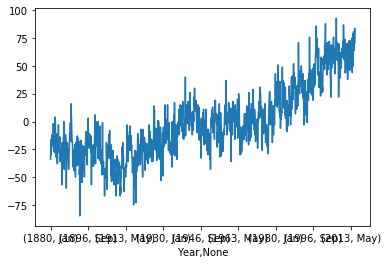

In [105]:
giss_temp_series.plot();

## Statistics

The `describe` method provides a statistical summary of the floating point data in a dataframe.

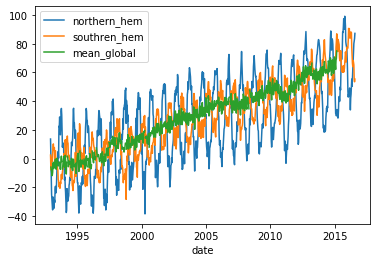

In [112]:
#mean_sea_level
#mean_sea_level.head(10)
#mean_sea_level.tail(10)
#mean_sea_level.dtypes

#mean_sea_level.iloc[500]
mean_sea_level.plot()

In [113]:
mean_sea_level.describe()

,northern_hem,southren_hem,mean_global
count,869.000000,869.000000,780.000000
mean,25.507298,28.730510,29.166036
std,29.555314,24.829111,21.226033
min,-38.377000,-28.239000,-11.796000
25%,4.119000,8.984000,11.130500
50%,24.781000,28.283000,31.783000
75%,47.391000,46.670000,45.047500
max,99.108000,90.633000,75.007000


To reduce noise in plots, rolling averages can be used, in this case over a window of 10 values.

In [114]:
full_globe_temp

year
1880-01-01   -0.1591
1881-01-01   -0.0789
1882-01-01   -0.1313
1883-01-01   -0.1675
1884-01-01   -0.2485
               ...  
2007-01-01    0.5472
2008-01-01    0.4804
2009-01-01    0.5551
2010-01-01       NaN
2011-01-01       NaN
Name: mean temp, Length: 132, dtype: float64

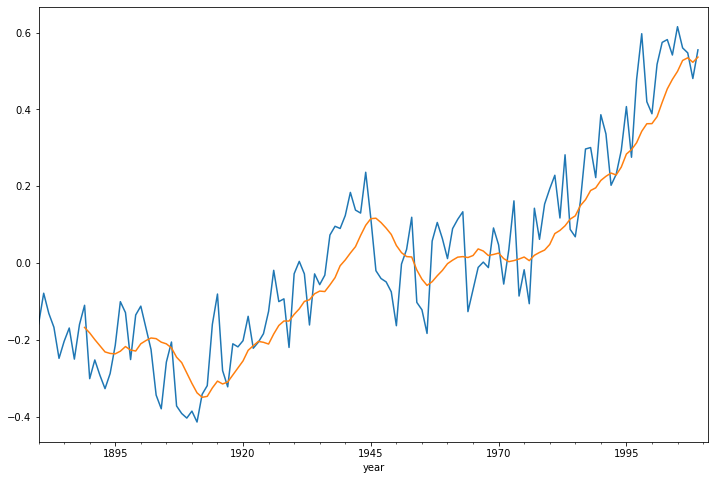

In [118]:
full_globe_temp.plot()
pd.Series.rolling(full_globe_temp, 10).mean().plot(figsize=LARGE_FIGSIZE);

## Group by

The `mean_sea_level` dataframe contains several rows for the same year, if we want to group those values, some transformations need to be done first.  We restore the original index, so that `data` is an ordinary column again.  Next, it is transformed so that only the year remains, which is stored in a new column `year`.

In [119]:
mean_sea_level

,northern_hem,southren_hem,mean_global
date,,,
1992.9323,13.717,2.517,NaN
1992.9595,1.328,-7.645,-5.818
1992.9866,-13.375,-2.267,-7.525
1993.0138,-24.723,0.855,-9.215
1993.0409,-29.231,-2.020,-11.796
...,...,...,...
2016.4426,75.595,67.053,NaN
2016.4697,80.087,65.238,NaN
2016.4969,81.619,54.950,NaN


In [120]:
mean_sea_level = mean_sea_level.reset_index()
mean_sea_level

,date,northern_hem,southren_hem,mean_global
0,1992.9323,13.717,2.517,NaN
1,1992.9595,1.328,-7.645,-5.818
2,1992.9866,-13.375,-2.267,-7.525
3,1993.0138,-24.723,0.855,-9.215
4,1993.0409,-29.231,-2.020,-11.796
...,...,...,...,...
864,2016.4426,75.595,67.053,NaN
865,2016.4697,80.087,65.238,NaN
866,2016.4969,81.619,54.950,NaN
867,2016.5240,83.580,53.514,NaN


In [121]:
mean_sea_level['year'] = mean_sea_level['date'].apply(int)
mean_sea_level

,date,northern_hem,southren_hem,mean_global,year
0,1992.9323,13.717,2.517,NaN,1992
1,1992.9595,1.328,-7.645,-5.818,1992
2,1992.9866,-13.375,-2.267,-7.525,1992
3,1993.0138,-24.723,0.855,-9.215,1993
4,1993.0409,-29.231,-2.020,-11.796,1993
...,...,...,...,...,...
864,2016.4426,75.595,67.053,NaN,2016
865,2016.4697,80.087,65.238,NaN,2016
866,2016.4969,81.619,54.950,NaN,2016
867,2016.5240,83.580,53.514,NaN,2016


The `groupby` method creates an object that one can iterate over, returning the group value, and a subdataframe for that group value.

In [122]:
grouped_sl = mean_sea_level.groupby('year')

In [123]:
for group, sub_df in grouped_sl:
    print(group)
    print(sub_df)
    print("")

1992
        date  northern_hem  southren_hem  mean_global  year
0  1992.9323        13.717         2.517          NaN  1992
1  1992.9595         1.328        -7.645       -5.818  1992
2  1992.9866       -13.375        -2.267       -7.525  1992

1993
         date  northern_hem  southren_hem  mean_global  year
3   1993.0138       -24.723         0.855       -9.215  1993
4   1993.0409       -29.231        -2.020      -11.796  1993
5   1993.0681       -32.538        -0.398      -11.291  1993
6   1993.0952       -35.588         4.102       -9.569  1993
7   1993.1223       -26.579         6.787       -3.714  1993
..        ...           ...           ...          ...   ...
35  1993.8825        10.529        -7.718       -4.588  1993
36  1993.9096        10.772        -6.169       -2.648  1993
37  1993.9368        10.732        -4.656       -0.795  1993
38  1993.9639         1.704         3.492        1.461  1993
39  1993.9911        -8.579        -0.251       -3.859  1993

[37 rows x 5 col

However, it also supports methods such as `mean` to compute aggregations over the values in the groups.

In [124]:
year_mean = grouped_sl.mean().drop('date', axis=1)
year_mean

,northern_hem,southren_hem,mean_global
year,,,
1992,0.556667,-2.465000,-6.671500
1993,-3.787108,-5.485378,-4.181882
1994,-4.631432,-3.523946,-3.668971
1995,-2.709314,-1.625171,-1.755452
1996,-1.184541,-0.204919,0.775912
...,...,...,...
2012,48.506541,53.315595,57.293730
2013,52.047757,54.749270,59.685571
2014,51.709861,60.794194,63.649583


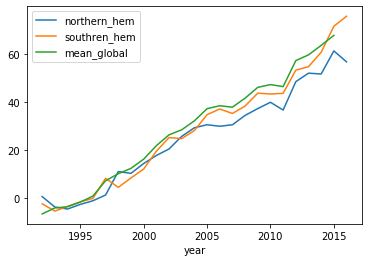

In [125]:
year_mean.plot();

## Pivot tables

A nice way to explore data and perform analysis is thruogh pivot tables, an operation supported directly on pandas dataframes.

In [126]:
set_option("display.max_rows", 20)
sales

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


The `Status` column is in fact categorical data, so we could transfrom that column using the `astype` method,
```
sales['Status'] = sales['Status'].astype('category')
```
We can set the order of the categorical values to suite our needs.  This will determine the sort order on this column.
```
sales['Status'].cat.set_categories(['won', 'presented', 'pending', 'declined'], inplace=True)
```
However, this brakes things badly later on, so we'll only do that once the bugs have been exterminated.

We want to know the sales by product and status, and are interested in the total price and quantity.

In [127]:
sales.pivot_table(index='Product', values=['Price', 'Quantity'], columns=['Status'], aggfunc=np.sum)

Price                              Quantity                    \
Status       declined  pending presented       won declined pending presented   
Product                                                                         
CPU          135000.0  40000.0   60000.0  230000.0      4.0     2.0       2.0   
Maintenance       NaN  15000.0       NaN    7000.0      NaN     5.0       NaN   
Monitor           NaN      NaN    5000.0       NaN      NaN     NaN       2.0   
Software          NaN      NaN   30000.0       NaN      NaN     NaN       3.0   

                  
Status       won  
Product           
CPU          9.0  
Maintenance  3.0  
Monitor      NaN  
Software     NaN

Of course, this yields some NaNs where no data is available, e.g., `Maintenance` has no `presented` or `declined` entries.  However, it would be more semantically correct to replace the NaNs by 0, since that is the actual intent.

In [128]:
sales.pivot_table(index='Product', values=['Price', 'Quantity'], columns=['Status'],
                  aggfunc=np.sum, fill_value=0)

Price                           Quantity                      
Status      declined pending presented     won declined pending presented won
Product                                                                      
CPU           135000   40000     60000  230000        4       2         2   9
Maintenance        0   15000         0    7000        0       5         0   3
Monitor            0       0      5000       0        0       0         2   0
Software           0       0     30000       0        0       0         3   0

Compute the average sales price per product status.

In [129]:
table = sales.pivot_table(index=['Product', 'Status'], values=['Price', 'Quantity'],
                          fill_value=0, aggfunc={'Price': [np.mean, len], 'Quantity': np.sum})
table

Price               Quantity
                        len          mean      sum
Product     Status                                
CPU         declined      3  45000.000000        4
            pending       1  40000.000000        2
            presented     2  30000.000000        2
            won           3  76666.666667        9
Maintenance pending       3   5000.000000        5
            won           1   7000.000000        3
Monitor     presented     1   5000.000000        2
Software    presented     3  10000.000000        3

Now we can query the table to get only the data for the status `won`.

In [130]:
table.query("Status == ['won']")

Price               Quantity
                     len          mean      sum
Product     Status                             
CPU         won        3  76666.666667        9
Maintenance won        1   7000.000000        3

The `table` object is just a pandas dataframe, so individual values can be obtained in the usual way.

In [131]:
table.loc['CPU', 'pending']['Price', 'mean']

40000.0

In [134]:
table.query("Status == ['won']").iloc[0]

Price     len         3.000000
          mean    76666.666667
Quantity  sum         9.000000
Name: (CPU, won), dtype: float64